<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Sep8-9/TareaSep9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#lib de SKlearn
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

#**Precios de Casas**
## Carga de Datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data=np.loadtxt("/content/drive/MyDrive/Colab Notebooks/houses.txt",delimiter = ',')

Mounted at /content/drive


In [3]:
Xh=data[:,:4]
th=data[:,4]
labels=["Tamaño","Habitaciones", "Pisos","Años"]

## Histograma de Distribucion

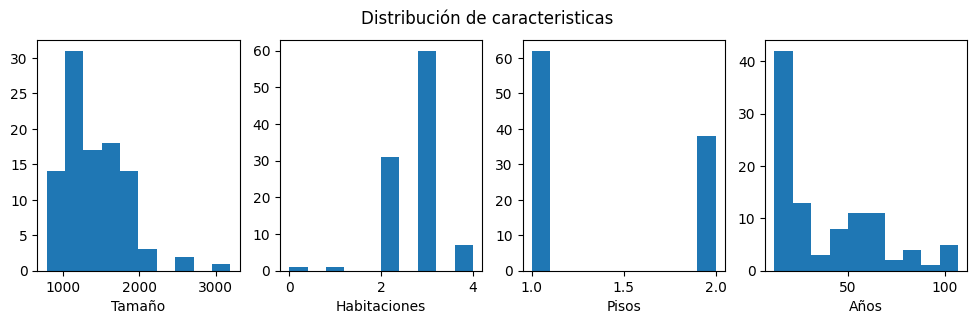

In [4]:
# Observamos la tendencia del comportamiento (Gaussiana?)
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas")
plt.show()

## Normalización

In [5]:
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)

# **SKlearn**
*class sklearn.linear_model.SGDRegressor(loss='squared_error', *, penalty='l2',alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)*

Parameters:

* loss:str, default=’squared_error’

  La función de pérdida que se utilizará. Los valores posibles son 'squared_error', 'huber', 'epsilon_inSENSITIVE' o 'squared_Epsilon_inSENSITIVE'

* penalty{‘l2’, ‘l1’, ‘elasticnet’, None}, default=’l2’

  La penalización (también conocida como término de regularización) que se utilizará. El valor predeterminado es 'l2', que es el regularizador estándar para modelos SVM lineales. 'l1' y 'elasticnet' podrían aportar escasez al modelo (selección de funciones) que no se puede lograr con 'l2'. No se añade ninguna penalización cuando se establece en None.

* **alpha:float, default=0.0001**

  Constante que multiplica el término de regularización. Cuanto mayor sea el valor, más fuerte será la regularización. También se utiliza para calcular la tasa de aprendizaje cuando learning_ratese establece en "óptimo".

* **l1_ratio:float, default=0.15**

  El parámetro de mezcla de Elastic Net, con 0 <= l1_ratio <= 1. l1_ratio=0 corresponde a la penalización L2, l1_ratio=1 a L1. Sólo se utiliza si penaltyes 'elasticnet'.

* **fit_intercept:bool, default=True**

  Si la intersección debe estimarse o no. Si es falso, se supone que los datos ya están centrados.

* **max_iter:int, default=1000**

  El número máximo de pases sobre los datos de entrenamiento (también conocidos como épocas). Solo afecta el comportamiento del fitmétodo, no el partial_fitmétodo.

* **tol:float or None, default=1e-3**

  El criterio de parada. Si no es Ninguno, el entrenamiento se detendrá cuando (loss > best_loss - tol) durante n_iter_no_changeépocas consecutivas. La convergencia se compara con la pérdida de entrenamiento o la pérdida de validación según el early_stoppingparámetro.

* **shuffle:bool, default=True**

  Si los datos de entrenamiento deben mezclarse o no después de cada época.

* **verbose:int, default=0**
  The verbosity level.

* **epsilon:float, default=0.1**

  Epsilon en funciones de pérdida insensibles a épsilon; solo si losses 'huber', 'epsilon_inSENSITIVE' o 'squared_Epsilon_inSENSITIVE'. Para 'huber', determina el umbral en el que se vuelve menos importante hacer la predicción exactamente correcta. Para los insensibles a épsilon, cualquier diferencia entre la predicción actual y la etiqueta correcta se ignora si son inferiores a este umbral.

* **random_state:int, RandomState instance, default=None**

  Se utiliza para mezclar los datos, cuando shuffleestá configurado en True. Pase un int para obtener una salida reproducible en múltiples llamadas a funciones. Ver Glosario .

* **learning_rate:str, default=’invscaling’**
The learning rate schedule:
  * ‘constant’: eta = eta0
  * ‘optimal’: eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.
  * ‘invscaling’: eta = eta0 / pow(t, power_t)
  * ‘adaptive’: eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.

* **eta0:float, default=0.01**

  La tasa de aprendizaje inicial para los programas "constantes", "invscaling" o "adaptativos". El valor predeterminado es 0,01.

* **power_t:float, default=0.25**

  El exponente de la tasa de aprendizaje de escala inversa.

* **early_stopping:bool, default=False**

  Si se debe utilizar la parada anticipada para finalizar el entrenamiento cuando la puntuación de validación no mejora. Si se establece en Verdadero, automáticamente reservará una fracción de los datos de entrenamiento como validación y finalizará el entrenamiento cuando la puntuación de validación devuelta por el scoremétodo no mejore al menos toldurante n_iter_no_changeépocas consecutivas.

* **validation_fraction:float, default=0.1**

  La proporción de datos de entrenamiento que se reservarán como conjunto de validación para la parada anticipada. Debe estar entre 0 y 1. Solo se usa si early_stoppinges Verdadero.

* **n_iter_no_change:int, default=5**

  Número de iteraciones sin mejoras que esperar antes de dejar de ajustar. La convergencia se compara con la pérdida de entrenamiento o la pérdida de validación según el early_stoppingparámetro.

* **warm_start:bool, default=False**

  Cuando se establece en Verdadero, reutilice la solución de la llamada anterior para que encaje como inicialización; de lo contrario, simplemente borre la solución anterior. Ver el Glosario ..

* **average:bool or int, default=False**

  Cuando se establece en Verdadero, calcula los pesos SGD promedio en todas las actualizaciones y almacena el resultado en el coef_atributo. Si se establece en un int mayor que 1, el promedio comenzará una vez que el número total de muestras observadas alcance average. Entonces average=10comenzará a promediar después de ver 10 muestras.

In [6]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, th)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant')
number of iterations completed: 17, number of weight updates: 1701.0


In [7]:
# al pedir los datos los encontramos separado el termino constante de intercepción
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [362.3239509], b:[111.22463931 -21.10204971 -32.17767538 -38.10155325]


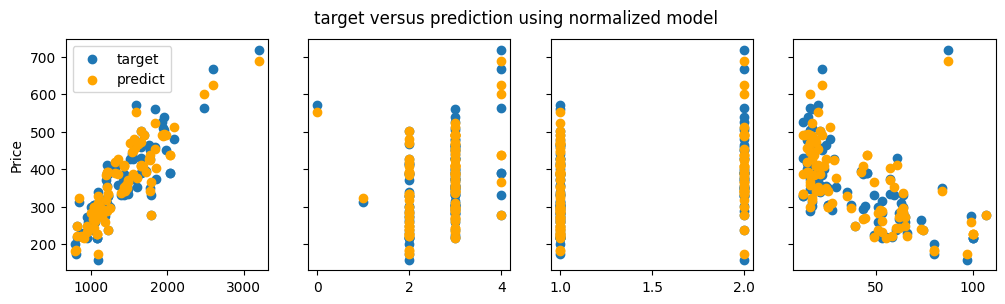

In [34]:
#y de predicción
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'target')
    ax[i].scatter(Xh[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()

## Separando en dos conjuntos uno de entrenamiento y otro de testeo

In [35]:
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

In [36]:
#se vueleve a correr el proceso
sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")


SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 28, number of weight updates: 1961.0
model parameters:                   w: [361.16642557], b:[109.69073874 -22.85384796 -35.62085489 -38.30352122]


In [37]:
#se prueba con el conjunto Test
sgdr.score(X_test,y_test)

0.9603448060278202

# **Keras**

In [38]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

In [ ]:
input_dim = 4
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

In [ ]:
num_epochs = 100
batch_size =X_train.shape[0] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

In [ ]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

In [39]:
# convierte el entrenamieto en dataframe
history_df = pd.DataFrame(history.history)

history_df['loss'].plot();

NameError: ignored

## Datos de problema a solucionar
A un director de enfermería le gustaría utilizar las características personales de las enfermeras para desarrollar un modelo de regresión para predecir el desempeño laboral (JOBPER). Las siguientes variables están disponibles para elegir las variables independientes que se incluirán en el modelo:
* X1 = asertividad (ASRV)
* X2 = entusiasmo (ENTH)
* X3 = ambición (AMB)
* X4 = habilidades comunicativas (COMM)
* X5 = habilidades para resolver problemas (PROBÞ)
* X6 = iniciativa (INIT)

Deseamos utilizar el procedimiento paso a paso para seleccionar variables independientes de las disponibles en la tabla para construir un modelo de regresión múltiple para predecir el desempeño laboral.

In [42]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/EXA_C11_S03_01.csv')
print(df)

     Y  X1  X2  X3  X4  X5  X6
0   45  74  29  40  66  93  47
1   65  65  50  64  68  74  49
2   73  71  67  79  81  87  33
3   63  64  44  57  59  85  37
4   83  79  55  76  76  84  33
5   45  56  48  54  59  50  42
6   60  68  41  66  71  69  37
7   73  76  49  65  75  67  43
8   74  83  71  77  76  84  33
9   69  62  44  57  67  81  43
10  66  54  52  67  63  68  36
11  69  61  46  66  64  75  43
12  71  63  56  67  60  64  35
13  70  84  82  68  64  78  37
14  79  78  53  82  84  78  39
15  83  65  49  82  65  55  38
16  75  86  63  79  84  80  41
17  67  61  64  75  60  81  45
18  67  71  45  67  80  86  48
19  52  59  67  64  69  79  54
20  52  71  32  44  48  65  43
21  66  62  51  72  71  81  43
22  55  67  51  60  68  81  39
23  42  65  41  45  55  58  51
24  65  55  41  58  71  76  35
25  68  78  65  73  93  77  42
26  80  76  57  84  85  79  35
27  50  58  43  55  56  84  40
28  87  86  70  81  82  75  30
29  84  83  38  83  69  79  41


In [51]:
Xh=np.array(df[['X1','X2','X3','X4','X5','X6']])
th=np.array(df['Y'])
labels=["ASRV","ENTH", "AMB","COMM","PROB","INIT"]

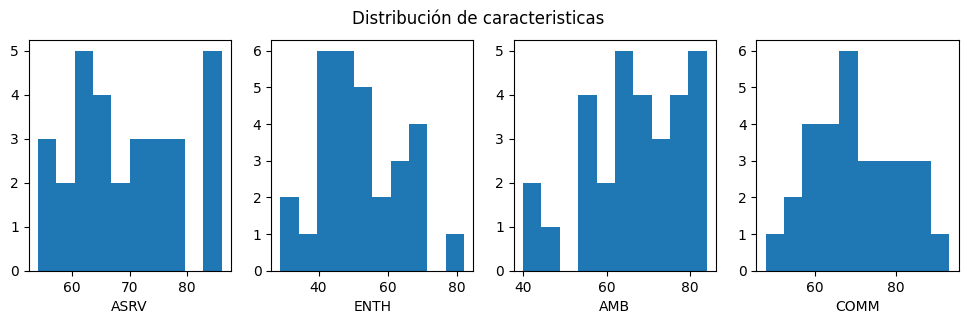

In [52]:
# Observamos la tendencia del comportamiento (Gaussiana?)
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas")
plt.show()

## Normalización

In [54]:
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)

In [55]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, th)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
# al pedir los datos los encontramos separado el termino constante de intercepción
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

SGDRegressor(learning_rate='constant')
number of iterations completed: 50, number of weight updates: 1501.0
model parameters:                   w: [66.57217288], b:[ 2.25860286 -2.17961006 10.0889343  -0.55359559  0.23626704 -2.46021715]


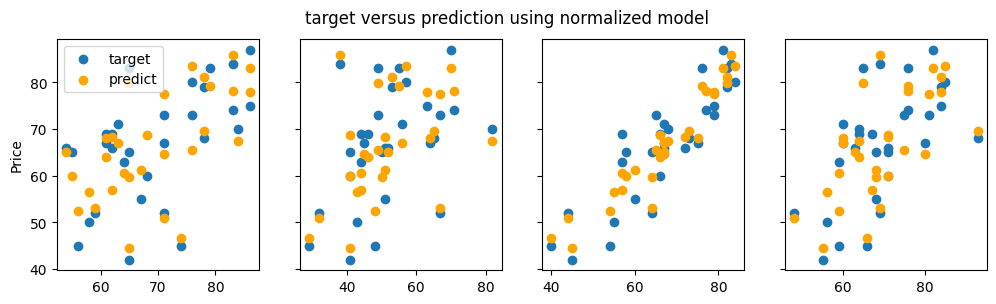

In [56]:
#y de predicción
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'target')
    ax[i].scatter(Xh[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

In [58]:
#se vueleve a correr el proceso
sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 90, number of weight updates: 1891.0
model parameters:                   w: [65.8795711], b:[ 3.21455021 -1.73232464 10.72008954 -2.24803957  0.84883609 -1.12010923]


In [59]:
#se prueba con el conjunto Test
sgdr.score(X_test,y_test)

0.7388646415159343

In [64]:
#se vueleve a correr el proceso
sgdr = SGDRegressor(max_iter=100, loss="squared_epsilon_insensitive",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

print(sgdr.score(X_test,y_test))

SGDRegressor(learning_rate='constant', loss='squared_epsilon_insensitive',
             max_iter=100, penalty=None)
number of iterations completed: 41, number of weight updates: 862.0
model parameters:                   w: [65.77072058], b:[ 3.20087464 -1.77458818 10.66016625 -2.18714895  0.89421659 -1.20049009]
0.7390053825620841


observamos que teniendo una prueba con otra funcion perdida "loss" tenemos otro valor para saber que tan bueno es el arreglo